In [6]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv("diabetes2.csv")
df_P = df[df.clase=="tested_positive"]
df_N = df[df.clase=="tested_negative"]

df_P

,preg,plas,pres,skin,insu,mass,pedi,age,clase
0,6,148,72,35,0,33.6,0.627,50,tested_positive
2,8,183,64,0,0,23.3,0.672,32,tested_positive
4,0,137,40,35,168,43.1,2.288,33,tested_positive
6,3,78,50,32,88,31.0,0.248,26,tested_positive
8,2,197,70,45,543,30.5,0.158,53,tested_positive
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,tested_positive
757,0,123,72,0,0,36.3,0.258,52,tested_positive
759,6,190,92,0,0,35.5,0.278,66,tested_positive
761,9,170,74,31,0,44.0,0.403,43,tested_positive


Text(0, 0.5, 'Frecuencia')

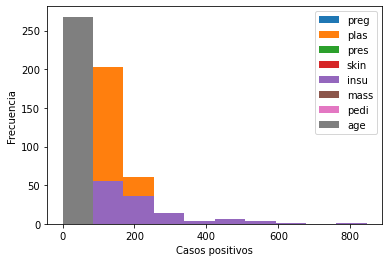

In [36]:
df_P.plot.hist()   #Histograma de resultados positivos
plt.xlabel("Casos positivos")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

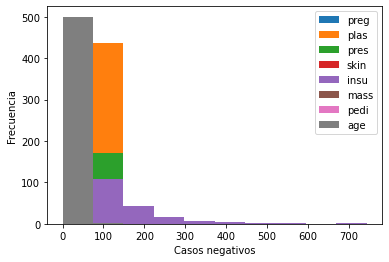

In [35]:
df_N.plot.hist()    #Histograma de resultados negativos
plt.xlabel("Casos negativos")
plt.ylabel("Frecuencia")

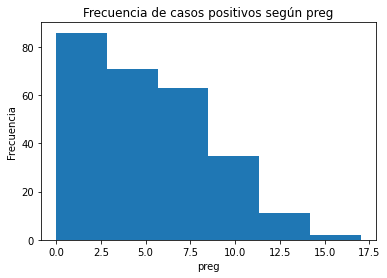

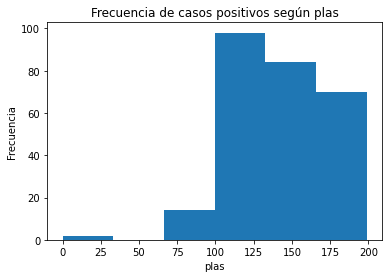

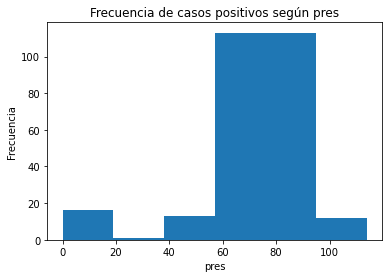

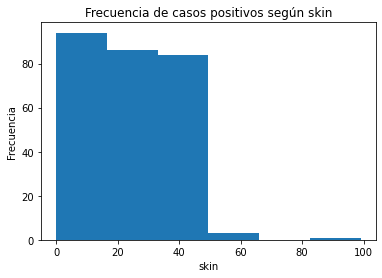

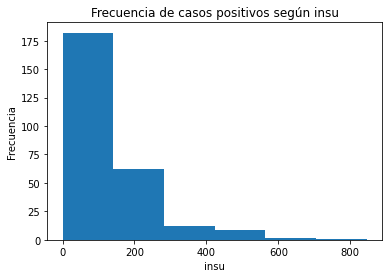

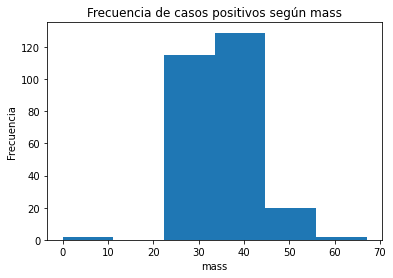

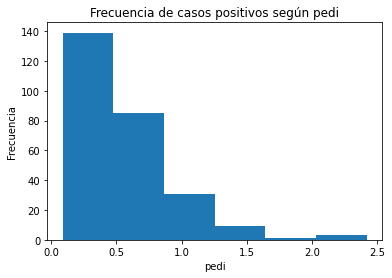

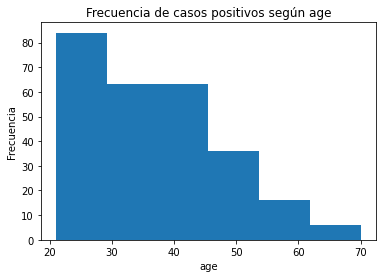

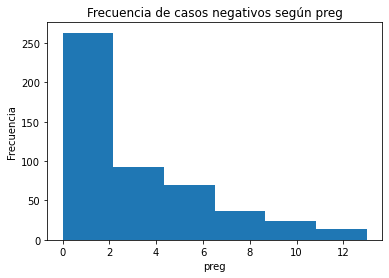

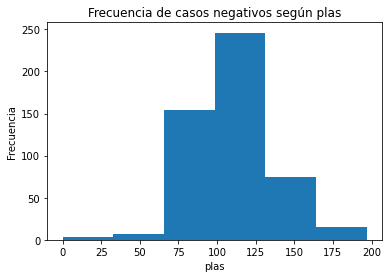

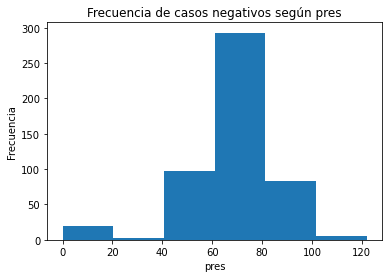

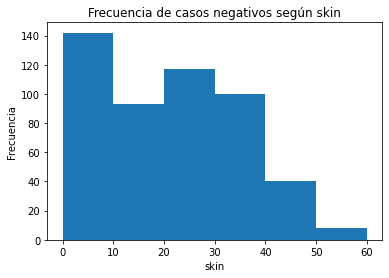

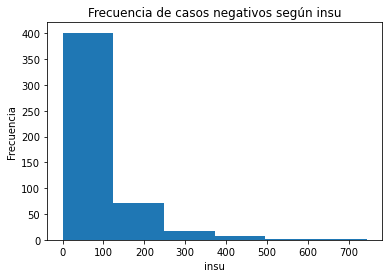

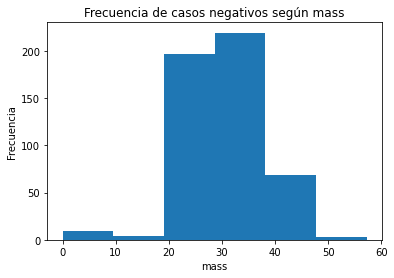

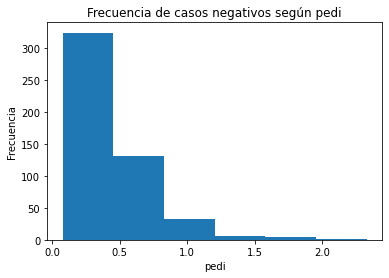

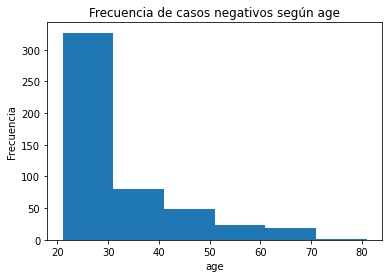

In [32]:
#Histograma de casos positivos

for i in range(0,8):
    df_P2=df_P.values
    x=df_P2[:,i]
    edad = plt.hist(x, 6)
    plt.title("Frecuencia de casos positivos según " + str(df_P.columns[i]))
    plt.xlabel(df_P.columns[i])
    plt.ylabel("Frecuencia")
    plt.show()
    
#Histograma de casos negativos
    
for i in range(0,8):
    df_N2=df_N.values
    x=df_N2[:,i]
    edad = plt.hist(x, 6)
    plt.title("Frecuencia de casos negativos según " + str(df_N.columns[i]))
    plt.xlabel(df_N.columns[i])
    plt.ylabel("Frecuencia")
    plt.show()


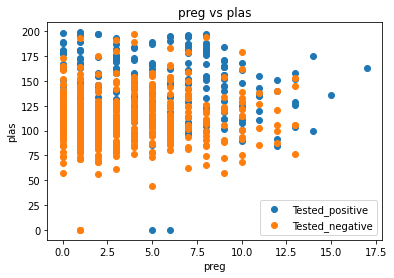

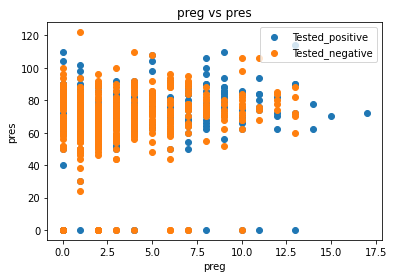

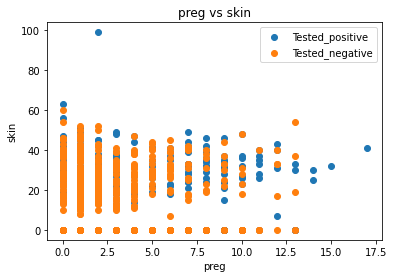

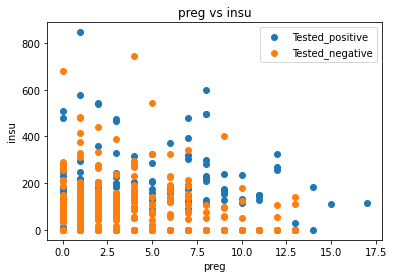

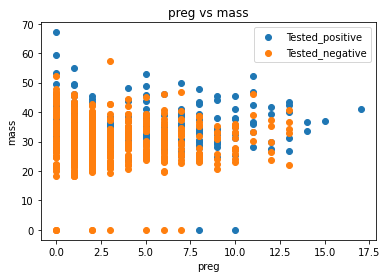

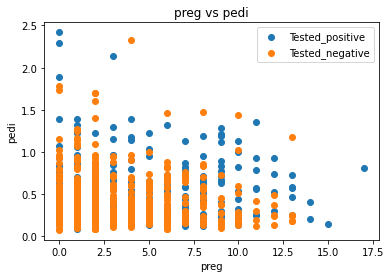

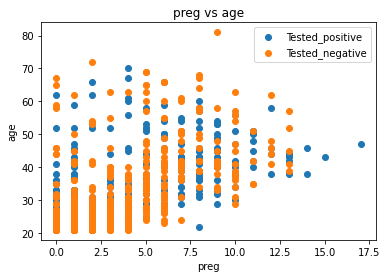

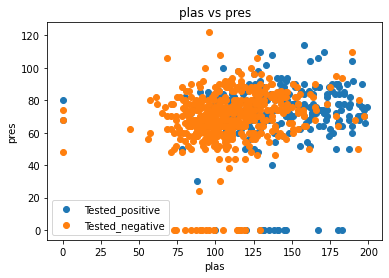

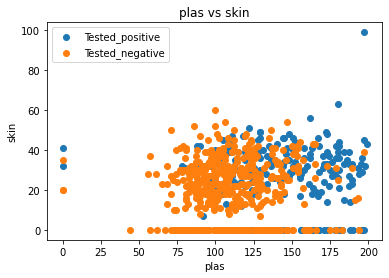

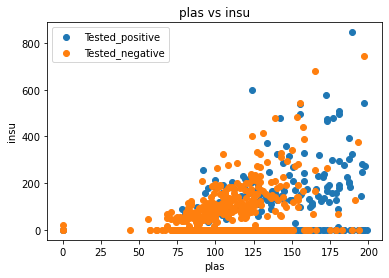

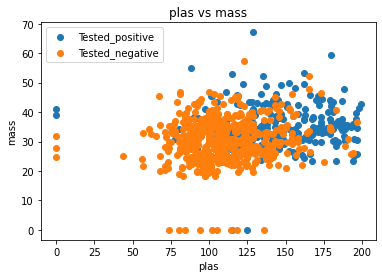

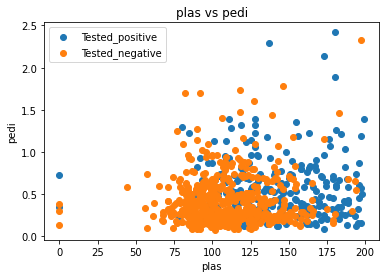

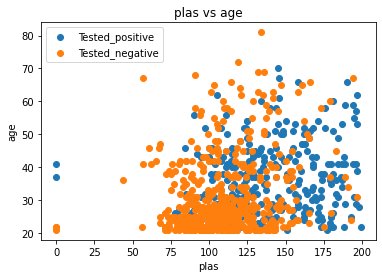

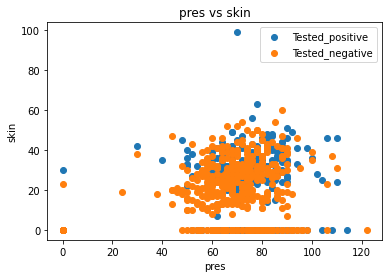

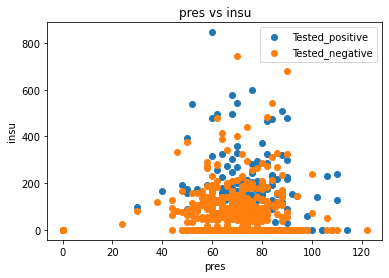

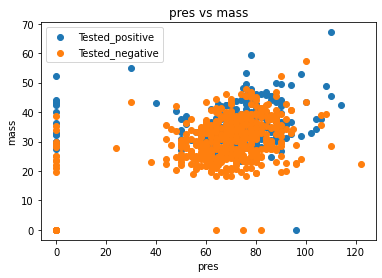

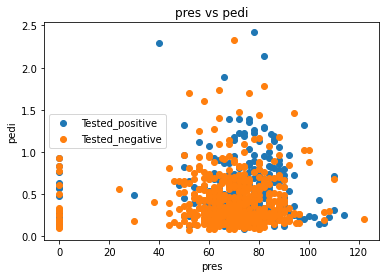

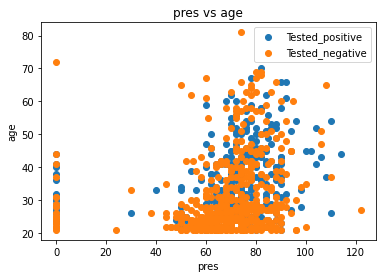

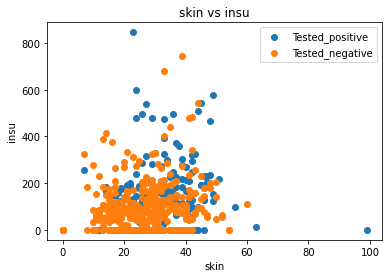

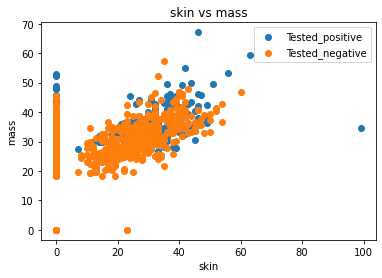

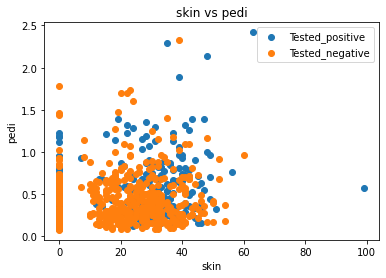

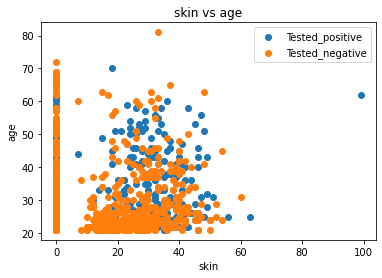

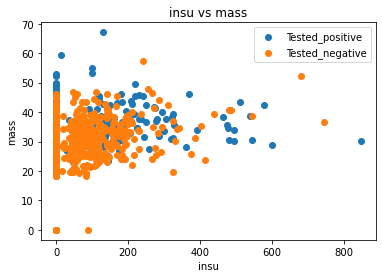

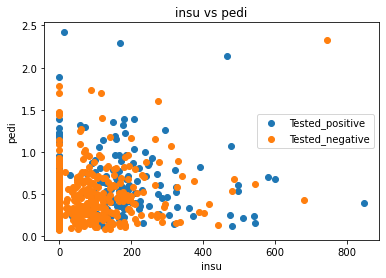

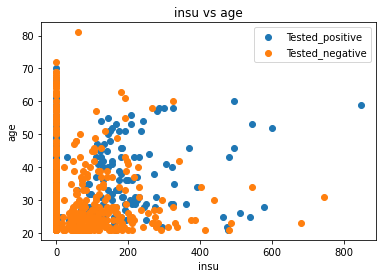

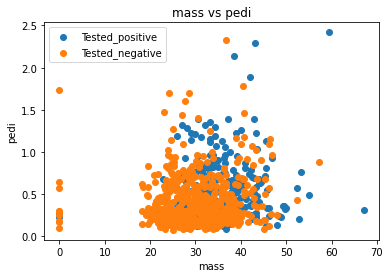

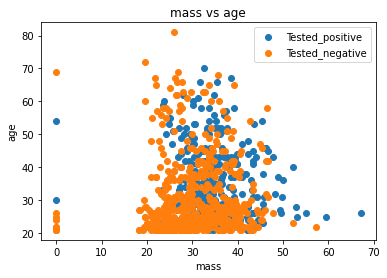

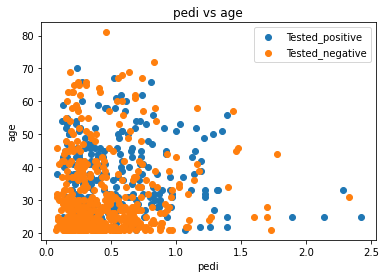

In [33]:
for i in range(0,8):
    for j in range(i,8):
        if (i != j):
            plt.scatter(df_P.values[:,i], df_P.values[:,j])
            plt.scatter(df_N.values[:,i], df_N.values[:,j])
            plt.title(str(df_P.columns[i]) + " vs " + str(df_N.columns[j]))
            plt.xlabel(df_P.columns[i])
            plt.ylabel(df_N.columns[j])
            plt.legend(["Tested_positive", "Tested_negative"])
            plt.show()

In [27]:
print(df_P)
#Obtenemos la media de cada caracteristica en el dataset para comparar
print("Media")
for i in range(0,8): #ciclo for que recorre las columnas
    columna = df.columns[i] #asigno variable para obtener el nombre de la columna
    #Se imprime resultado de Hombres con la media de su respectiva columna y igualmente las mujeres
    print(columna,"\n Positivo: ",np.mean(df_P.loc[:,columna]),"Negativo: ",np.mean(df_N.loc[:,columna]))


     preg  plas  pres  skin  insu  mass   pedi  age            clase
0       6   148    72    35     0  33.6  0.627   50  tested_positive
2       8   183    64     0     0  23.3  0.672   32  tested_positive
4       0   137    40    35   168  43.1  2.288   33  tested_positive
6       3    78    50    32    88  31.0  0.248   26  tested_positive
8       2   197    70    45   543  30.5  0.158   53  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
755     1   128    88    39   110  36.5  1.057   37  tested_positive
757     0   123    72     0     0  36.3  0.258   52  tested_positive
759     6   190    92     0     0  35.5  0.278   66  tested_positive
761     9   170    74    31     0  44.0  0.403   43  tested_positive
766     1   126    60     0     0  30.1  0.349   47  tested_positive

[268 rows x 9 columns]
Media
preg 
 Positivo:  4.865671641791045 Negativo:  3.298
plas 
 Positivo:  141.25746268656715 Negativo:  109.98
pres 
 Positivo:  70.8246268656716

In [11]:
df2 = df.replace(['tested_negative','tested_positive'], [0,1])
df2.corr()

,preg,plas,pres,skin,insu,mass,pedi,age,clase
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
clase,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
#Convertir a formato de numpy
data = df.values
X = data[:,0:8]
y = data[:,[8]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

for k in range(3,12,2):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) 
    score = neigh.score(X_test,y_test)
    print(k,score)
    
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train) 

(768, 8)
(384, 8)
(384, 8)
3 0.6953125
5 0.703125
7 0.6901041666666666
9 0.7239583333333334
11 0.71875


C:\Users\emili\anaconda3\envs\TC1002\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\emili\anaconda3\envs\TC1002\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\emili\anaconda3\envs\TC1002\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\emili\anaconda3\envs\TC1002\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was 

KNeighborsClassifier(n_neighbors=9)

In [24]:
X_positivo = [5,220,92,0,0,38.2,0.278,80]

#preg #plas^ #pres #skin #insu #mass^ #pedi #age^

X_negativo = [0,150,80,0,0,25,0.278,25]

#preg #plas^ #pres #skin #insu #mass^ #pedi #age^

print(neigh.predict([X_positivo]))
print(neigh.predict([X_negativo]))

['tested_positive']
['tested_negative']


# Conclusión


Acorde a los datos analizados se concluyo que las variables que más influyen a la hora de detectar un caso positivo de diabates tipo 2 son el plas, que es el análisis de tolerancia a la glucosa, en el cual lo normal para una persona es de 140 mg/dL, y una medida de 200 mg/dL indicaria seguramente diabetes. otra de las variables que identificamos seria mass que indica el indice de masa corporal en el que lo normal seria de 25. Y por último la edad en la que mientras más edad afecta a mayor relación con los casos positivos.